# Affinity expectations

The absolute FEP calculations produce a range of (mostly negative) free energies of binding.  But what kind of binding free energies *should* we expect?

## Thermodynamic path

The full thermodynamic path for calculating the binding free energy is calculated from three quantities:

* $\Delta G_{RL}$, the free energy of *coupling* the ligand to the receptor
* $\Delta G_{L}$, the free energy of *coupling* the ligand to pure solvent
* $\Delta G_{rest}$, the free of *constraining* the ligand with a harmonic potential (a positive number)

For our `v2` and `v3` protocols, the number `febkT` that reported in  our rankings is the cost of *decoupling* the ligand from solvent, and then coupling it to the receptor with a harmonic restraint in place with force constant $k$ = 800.0 kJ nm$^{-1}$.

`febkT` = $\Delta G_{RL}$ - $\Delta G_{L}$

To correctly account for the presence of the harmonic restraint, we would need to subtract the free energy of restraint to obtain the free energy of binding (at the concentration used in the simulation):

$\Delta G_{RL}$ - $\Delta G_{L}$ - $\Delta G_{rest}$

Using the MBAR free energy estimator, we estimate that most of the ligands screened have $\Delta G_{rest}$ around +2.0 $kT$.   For now we will just assume this is a fixed number, and can refine estimates later.

## Typical $K_D$ at standard concentrations

Suppose our `febkT` prediction is $\Delta G_{febKT}$ = -10.0 kT.  What is the predicted value of K_D?

Our simulations have a concentration of $C = 1/V_0 = (6.022 \times 10^{23})^{-1}$ mol $/ 570.6 (10^{-8})^3$ dm$^3$, which is about 2.91 mM.

In [9]:
C = (1./6.022e23)/(570.6e-24)  # in mol/L
print('C =', C, 'M =', C*1000., 'mM')

C_0 = 1.0   # in M
print('C_0 =', C_0, 'M is the standard concentration')

C = 0.002910231127063834 M = 2.910231127063834 mM
C_0 = 1.0 M is the standard concentration


Our corrected estimate of binding free energy at 2.91 mM is

$\Delta G_b = +kT \ln(K_D/C) = \Delta G_{febkT}$ - 2 $kT$ = -12 $kT$.

To get this into the binding free energy $\Delta G_b$˚ at standard concentration ($C_0 =$ 1 M), we correct for our simualtion concentration

$\Delta G_b$˚$ = +kT \ln(K_D/C_0) = \Delta G_b + kT \ln \frac{C}{C_0}$ ...

In [10]:
# kT \ln \frac{C}{C_0}
np.log(C/C_0)

-5.839522775844896

... $\Delta G_b$˚$ = -12 - 5.839 = -17.839 $kT$

In [14]:
K_D = np.exp(-17.839)
print(K_D)

1.7890428281453674e-08


... so a $K_D$ of about 17 nM!

How about a prediction of `febkT` = -15 kT?

This would translate to about $\Delta G_b$˚$ = -17 - 5.839 = -22.839 $kT$

In [15]:
K_D = np.exp(-22.839)
print(K_D)

1.2054475755137456e-10


...or a $K_D$ of about 0.12 nM!

Here's a handy conversion function to convert our `febkT` value into a predicted $K_D$:

In [24]:
def febkT_to_KD(febkT, dG_rest=2.0, box_length=8.2947):
    """Converts our febkT value to a K_D value in (M = mol/L).
    
    INPUT
    febkT      - our febkT score (in kT)
    
    PARAMETERS
    dG_rest    - the free energy of *restraining* the ligand (in kT)
                 NOTE: this should be a positive number
    box_length - the simulated PBC box length (in nm).
                 NOTE: a cubic box is assumed
    
    RETURNS
    K_D      - the estimated K_D value (in M)"""
    
    # Convert the box length to a simulated concentration
    N_A = 6.022e23
    V_0 = (box_length/1.0e8)**3   # in dm^3 = L
    simulated_conc = 1.0/(N_A*V_0)

    dG_standard = febkT - dG_rest + np.log(simulated_conc)
    K_D = np.exp(dG_standard)
    
    return K_D

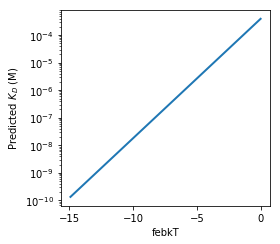

In [25]:
# Here's a conversion chart

from matplotlib import pyplot as plt
%matplotlib inline

x_febkt = np.arange(0, -15.0, -0.1)
y_KD = febkT_to_KD(x_febkt)

plt.figure(figsize=(4,3.5))
plt.plot(x_febkt, y_KD, lw=2.0)
plt.xlabel('febkT')
plt.ylabel('Predicted $K_D$ (M)')
plt.yscale('log')
plt.tight_layout()
plt.savefig('febkT_to_KD.pdf')
plt.show()

